# 온라인 학습 플랫폼 사용자 행동 패턴 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib 

학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측
- 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석
- 구독 결정에 영햐을 미치는지 확인

유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석   
이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.

In [2]:
data = pd.read_table('data/mini.csv',sep=',')
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [5]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [6]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\hsh97\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 581.0 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 980.4 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\hsh97\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
# 'target' 컬럼의 값 변경 ( 0 -> 구독 취소, 1 -> 구독 연장)
data['구독 연장 여부'] = data['target'].map({0: '구독 취소', 1: '구독 연장'}) # target 컬럼의 각 값을 새로운 문자열 값으로 매핑, 결과를 '구독 연장 여부'라는 컬럼에 저
data.drop('target', axis=1, inplace=True) # target 컬럼 삭제(컬럼 기준으로, 원본 데이터프레임 수정)

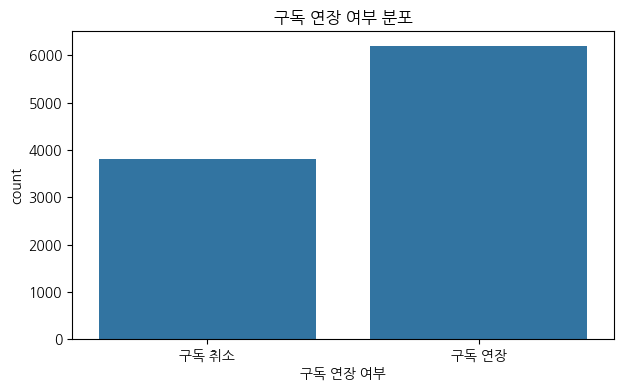

In [8]:
# 구독 연장 여부의 분포 확인
plt.figure(figsize=(7, 4)) # 7x4 사이즈 그램 생성
sns.countplot(data=data, x='구독 연장 여부') #데이터프레임에서 x축에 구독 연장 여부 컬럼 값들을 표시하고 값 분포를 막대 그래프로 보여줘라
plt.title('구독 연장 여부 분포') # 막대 그래프 이름은 '구독 연장 여부 분포'
plt.show()

In [9]:
kor_var = {
    'monthly_active_learning_days' : '월간 활동 학습 일수',
    'average_login_time' : '평균 로그인 시간',
    'community_engagement_level' : '커뮤니티 참여도', 
    'preferred_difficulty_level' : '선호하는 난이도',
    'subscription_type' : '구독 유형',
    'average_time_per_learning_session' : '학습 세션당 평균 시간',
    'total_completed_courses' : '완료한 총 코스 수'
} #변수명 한글로 바꾸기

In [10]:
data_montly_target = data[['monthly_active_learning_days', '구독 연장 여부']]
data_montly_target

,monthly_active_learning_days,구독 연장 여부
0,18,구독 취소
1,16,구독 연장
2,13,구독 연장
3,19,구독 연장
4,19,구독 연장
...,...,...
9995,18,구독 연장
9996,9,구독 연장
9997,24,구독 연장
9998,10,구독 연장


In [11]:
active_counts = data_montly_target.groupby('monthly_active_learning_days')['구독 연장 여부'].value_counts().unstack(fill_value=0)
active_counts # 인덱스 : 월간 활동 학습 일수, 열 : 구독 연장 여부
# 데이터프레임을 '월간 활동 학습 일수' 열을 기준으로 그룹화
# 구독 연장 여부 열의 값을 기준으로 빈도 계산 

구독 연장 여부,구독 연장,구독 취소
monthly_active_learning_days,,
1,263,132
2,243,154
3,254,158
4,269,177
5,256,167
6,248,158
7,260,162
8,284,168
9,253,162


In [57]:
# 월간 활동 학습 일수 최대,최소,평균
max_value = data['monthly_active_learning_days'].max()
min_value = data['monthly_active_learning_days'].min()
avg_value = data['monthly_active_learning_days'].mean()
print(f"Max: {max_value:.2f}")
print(f"Min: {min_value:.2f}")
print(f"Avg: {avg_value:.2f}")

Max: 24.00
Min: 1.00
Avg: 12.55


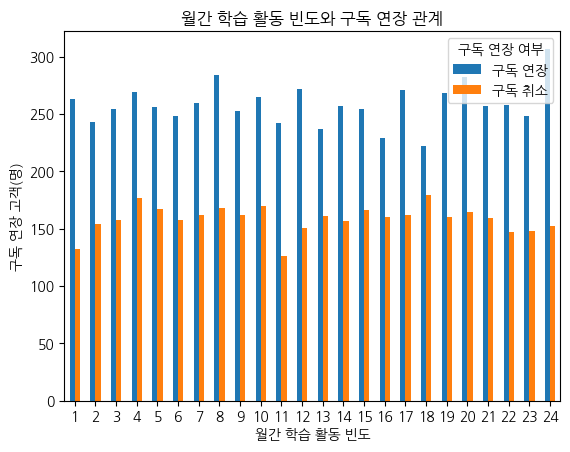

In [12]:
# 막대 그래프로 월간 학습 활동 빈도와 구독 연장 고객수의 관계가 있는지 확인
active_counts.plot(kind='bar', rot=0)
plt.title('월간 학습 활동 빈도와 구독 연장 관계')
plt.xlabel('월간 학습 활동 빈도')
plt.ylabel('구독 연장 고객(명)')

plt.show()

In [13]:
# 평균 로그인 시간과 구독 연장 여부
#data['average_login_time'] = data['average_login_time'].round(2) #소수점 둘째 자리까지 표시
#avg_login_time_target = data[['average_login_time', '구독 연장 여부']]
#avg_login_time_target

,average_login_time,구독 연장 여부
0,14.95,구독 취소
1,18.45,구독 연장
2,16.20,구독 연장
3,17.63,구독 연장
4,21.39,구독 연장
...,...,...
9995,14.73,구독 연장
9996,19.37,구독 연장
9997,18.24,구독 연장
9998,18.78,구독 연장


In [18]:
avg_login_time_target = data[['average_login_time', '구독 연장 여부']]
avg_login_time_target

,average_login_time,구독 연장 여부
0,14.95,구독 취소
1,18.45,구독 연장
2,16.20,구독 연장
3,17.63,구독 연장
4,21.39,구독 연장
...,...,...
9995,14.73,구독 연장
9996,19.37,구독 연장
9997,18.24,구독 연장
9998,18.78,구독 연장


In [14]:
max_value = data['average_login_time'].max()
min_value = data['average_login_time'].min()
avg_value = data['average_login_time'].mean()
print(f"Max: {max_value:.2f}")
print(f"Min: {min_value:.2f}")
print(f"Avg: {avg_value:.2f}")

Max: 27.00
Min: 2.37
Avg: 14.99


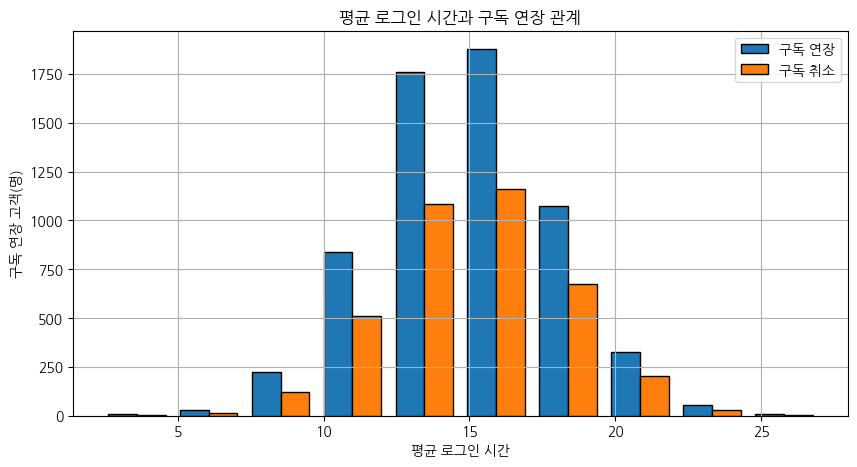

In [83]:
# 히스토그램 그래프로 평균 로그인 시간과 구독 연장 고객수의 관계가 있는지 확인
target_y_df = avg_login_time_target[avg_login_time_target['구독 연장 여부'] == '구독 연장']
target_n_df = avg_login_time_target[avg_login_time_target['구독 연장 여부'] == '구독 취소']

plt.figure(figsize=(10, 5))  # 그림 크기 설정
plt.hist([target_y_df['average_login_time'],
          target_n_df['average_login_time']], 
          bins=10, 
          edgecolor='black',
          label=['구독 연장', '구독 취소'])  # 히스토그램 그리기
plt.title('평균 로그인 시간과 구독 연장 관계')  # 그래프 제목 설정
plt.xlabel('평균 로그인 시간')  # x축 레이블 설정
plt.ylabel('구독 연장 고객(명)')  # y축 레이블 설정
plt.grid(True)  # 그리드 표시
plt.legend()
plt.show() 

In [38]:
preferred_level_target = data[['monthly_active_learning_days', '구독 연장 여부']]
preferred_level_target

,monthly_active_learning_days,구독 연장 여부
0,18,구독 취소
1,16,구독 연장
2,13,구독 연장
3,19,구독 연장
4,19,구독 연장
...,...,...
9995,18,구독 연장
9996,9,구독 연장
9997,24,구독 연장
9998,10,구독 연장


In [39]:
# 선호하는 난이도와 구독 연장 여부
data['preferred_difficulty_level'] = data['preferred_difficulty_level'] 
preferred_count = data[['preferred_difficulty_level', '구독 연장 여부']]
preferred_count

,preferred_difficulty_level,구독 연장 여부
0,Low,구독 취소
1,Medium,구독 연장
2,Medium,구독 연장
3,Low,구독 연장
4,Medium,구독 연장
...,...,...
9995,Low,구독 연장
9996,Medium,구독 연장
9997,High,구독 연장
9998,Low,구독 연장


In [59]:
# 커뮤니티 참여도와 구독 연장 여부
community_target = data[['community_engagement_level', '구독 연장 여부']]
community_target

,community_engagement_level,구독 연장 여부
0,4,구독 취소
1,3,구독 연장
2,4,구독 연장
3,3,구독 연장
4,4,구독 연장
...,...,...
9995,5,구독 연장
9996,3,구독 연장
9997,5,구독 연장
9998,5,구독 연장


In [64]:
# 커뮤니티 참여도와 구독 연장 여부
community_counts = community_target.groupby('community_engagement_level')['구독 연장 여부'].value_counts().unstack(fill_value=0)
community_counts



구독 연장 여부,구독 연장,구독 취소
community_engagement_level,,
1,348,211
2,751,468
3,968,620
4,1265,805
5,2867,1697


In [80]:
preferred_level_target = data[['preferred_difficulty_level', '구독 연장 여부']]
preferred_level_target

,preferred_difficulty_level,구독 연장 여부
0,Low,구독 취소
1,Medium,구독 연장
2,Medium,구독 연장
3,Low,구독 연장
4,Medium,구독 연장
...,...,...
9995,Low,구독 연장
9996,Medium,구독 연장
9997,High,구독 연장
9998,Low,구독 연장


In [81]:
preferred_counts = preferred_level_target.groupby('preferred_difficulty_level')['구독 연장 여부'].value_counts().unstack(fill_value=0)
preferred_counts

구독 연장 여부,구독 연장,구독 취소
preferred_difficulty_level,,
High,1241,759
Low,3047,1945
Medium,1911,1097


In [52]:
data['구독 연장 여부'].value_counts()

구독 연장 여부
구독 연장    6199
구독 취소    3801
Name: count, dtype: int64

In [78]:
temp_df = data.copy()
temp_df['target'] = temp_df['구독 연장 여부'].replace({'구독 연장': 1,
                                                       '구독 취소': 0})

In [55]:
temp_summary_df = temp_df.groupby('preferred_difficulty_level').agg(target_rate=('target', lambda x: x.sum()/len(x)))
temp_summary_df

,target_rate
preferred_difficulty_level,
High,0.620500
Low,0.610377
Medium,0.635306


<Axes: xlabel='preferred_difficulty_level'>

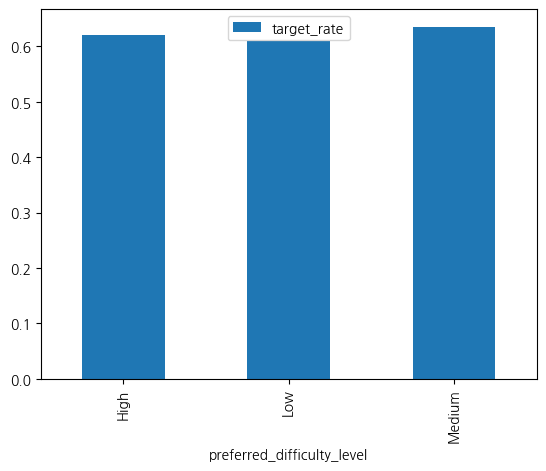

In [56]:
temp_summary_df.plot.bar()

In [65]:
type_target = data[['subscription_type', '구독 연장 여부']]
type_target

,subscription_type,구독 연장 여부
0,Basic,구독 취소
1,Basic,구독 연장
2,Premium,구독 연장
3,Basic,구독 연장
4,Basic,구독 연장
...,...,...
9995,Premium,구독 연장
9996,Basic,구독 연장
9997,Basic,구독 연장
9998,Basic,구독 연장


In [66]:
type_counts = type_target.groupby('subscription_type')['구독 연장 여부'].value_counts().unstack(fill_value=0)
type_counts

구독 연장 여부,구독 연장,구독 취소
subscription_type,,
Basic,3683,2296
Premium,2516,1505


In [69]:
temp_df2 = data.copy()
temp_df2['target'] = temp_df['구독 연장 여부'].replace({'구독 연장': 1,
                                                       '구독 취소': 0})

In [70]:
temp_summary_df2 = temp_df.groupby('subscription_type').agg(target_rate=('target', lambda x: x.sum()/len(x)))
temp_summary_df2

,target_rate
subscription_type,
Basic,0.615989
Premium,0.625715


<Axes: xlabel='subscription_type'>

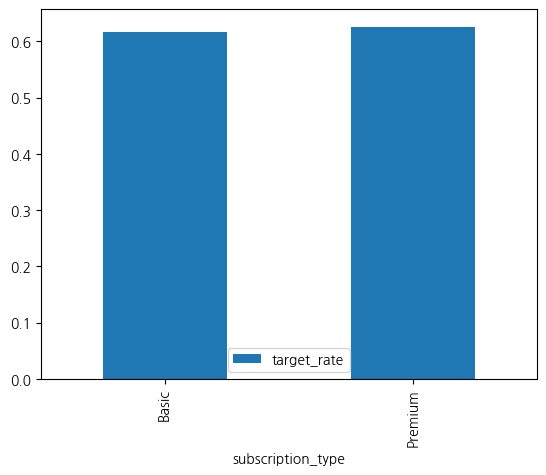

In [71]:
temp_summary_df2.plot.bar()

In [91]:
# 막대 그래프로 구독유형과 구독 연장 고객수의 관계가 있는지 확인
target_a_df = type_target[type_target['subscription_type'] == 'Premium']
target_b_df = type_target[type_target['subscription_type'] == 'Basic']


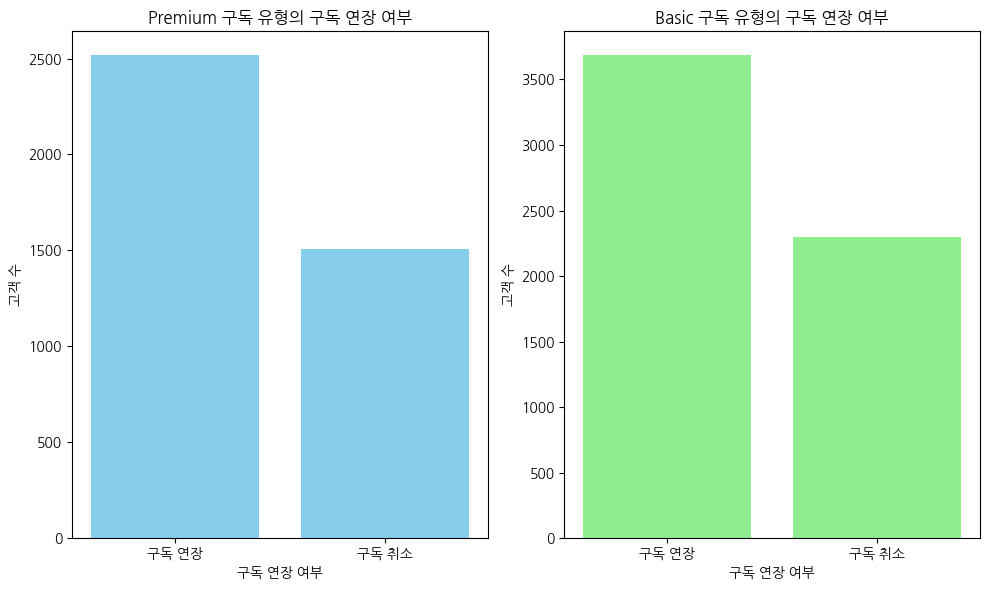

In [93]:
target_a_counts = target_a_df['구독 연장 여부'].value_counts()
target_b_counts = target_b_df['구독 연장 여부'].value_counts()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(target_a_counts.index, target_a_counts.values, color='skyblue')
plt.title('Premium 구독 유형의 구독 연장 여부')
plt.xlabel('구독 연장 여부')
plt.ylabel('고객 수')

plt.subplot(1, 2, 2)
plt.bar(target_b_counts.index, target_b_counts.values, color='lightgreen')
plt.title('Basic 구독 유형의 구독 연장 여부')
plt.xlabel('구독 연장 여부')
plt.ylabel('고객 수')

plt.tight_layout()
plt.show()

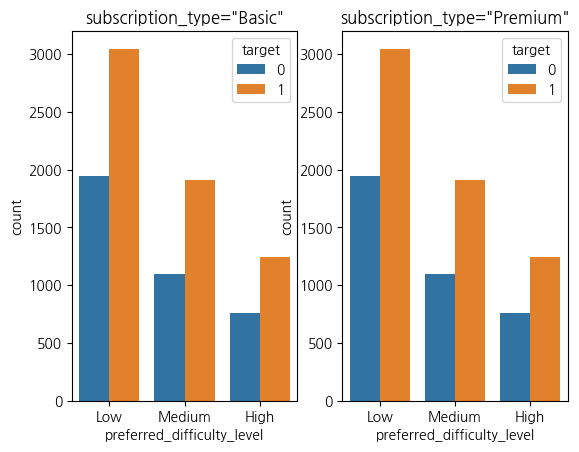

In [101]:
for i, x in enumerate(['Basic', 'Premium']):
    temp_df3 = data[data['subscription_type'] == x]
    plt.subplot(1, 2, i+1)
    sns.countplot(temp_df, x="preferred_difficulty_level", hue="target")
    plt.title(f'subscription_type="{x}"')
plt.show()

In [104]:
data.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       '구독 연장 여부'],
      dtype='object')

In [109]:
prep_df = data.copy()
prep_df['target'] = prep_df['구독 연장 여부'].replace({'구독 연장': 1,
                                                        '구독 취소': 0})

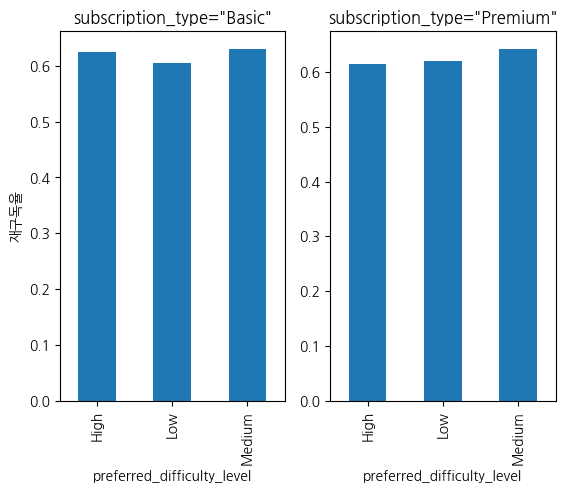

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2)
summary_df = prep_df.groupby(['subscription_type', 'preferred_difficulty_level']).agg(target_rate=('target', lambda x: x.sum()/len(x)))
for i, x in enumerate(['Basic', 'Premium']):
    plt.subplot(1, 2, i+1)
    summary_df.loc[x].plot.bar(ax=axes[i], legend=False)
    plt.title(f'subscription_type="{x}"')
    if i == 0:
        plt.ylabel('재구독율')